## Removing Overfitting
- Accuracy on Train data: 98
- Accuracy on Test data: 88

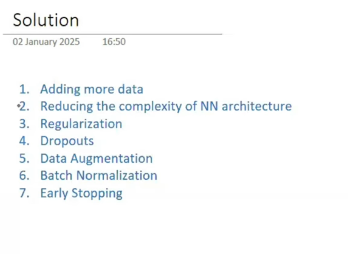


Here we only use three optimization techniques
1. Regularization
2. Dropouts
3. Batch Normalization

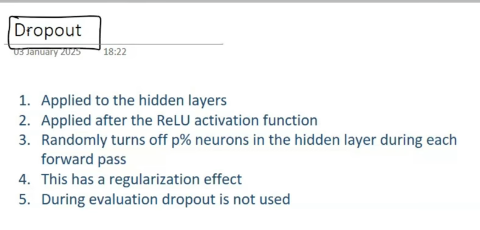

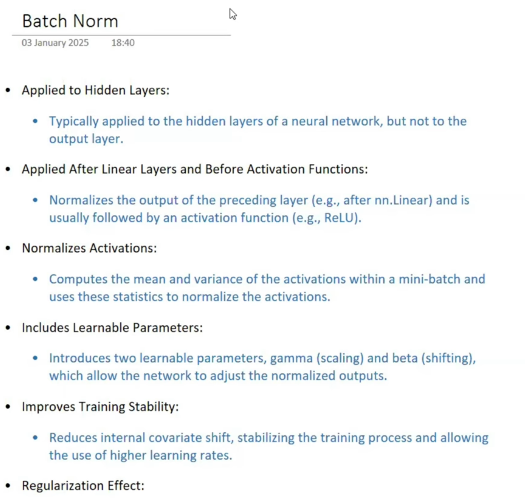

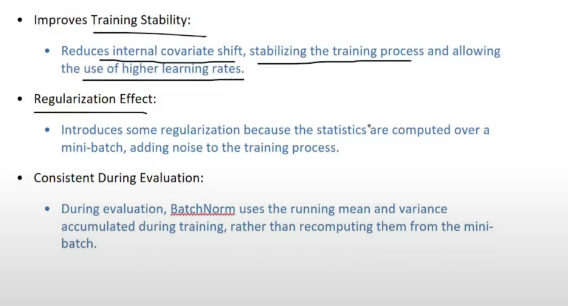

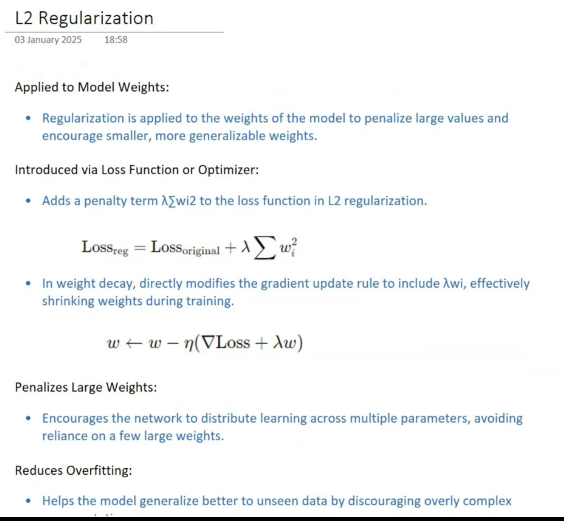

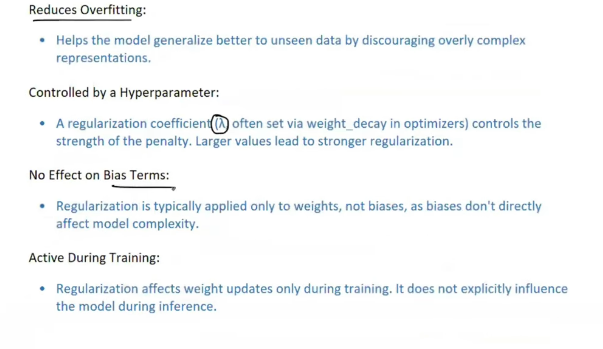

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [16]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(60000, 785)

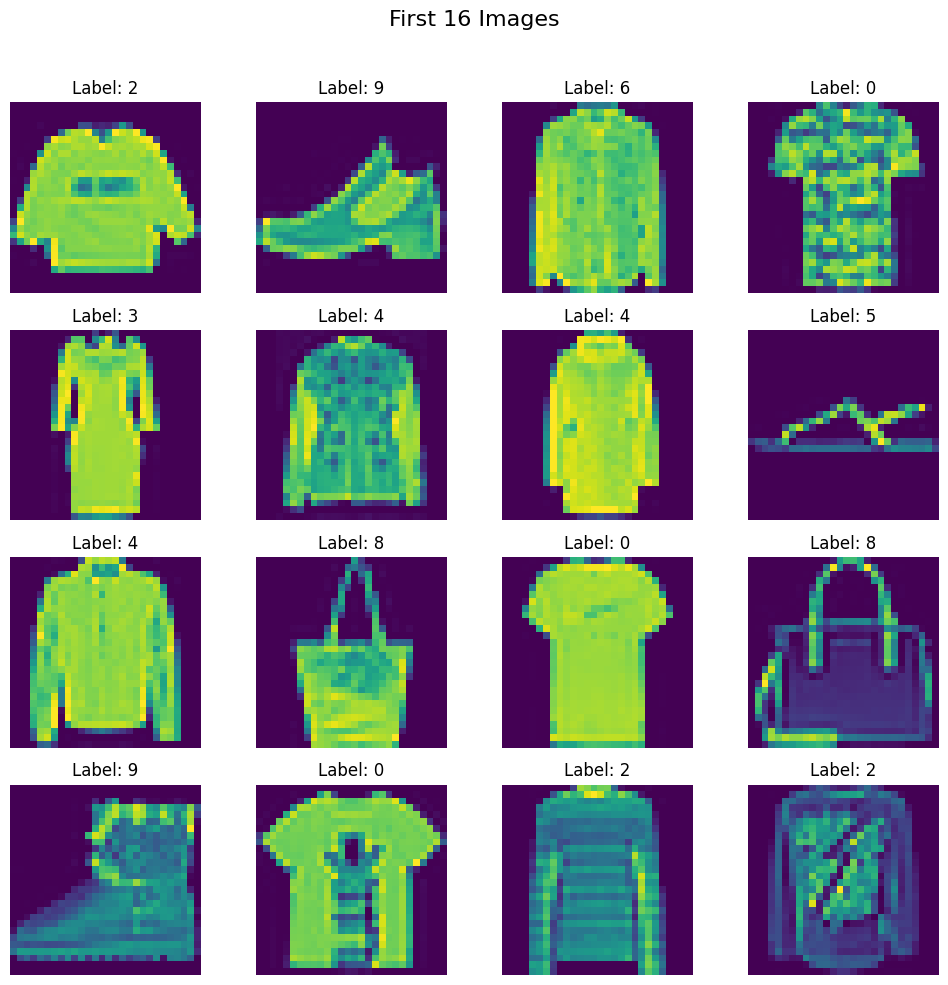

In [6]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [7]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [11]:
train_dataset = CustomDataset(X_train, y_train)

In [12]:
test_dataset = CustomDataset(X_test, y_test)

In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
len(train_loader)

1500

In [17]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),  # batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.3),    # DropOut
            nn.Linear(128, 64),

            nn.BatchNorm1d(64),   # batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.3),    # DropOut
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [18]:
learning_rate = 0.01
epochs = 100

In [19]:
model = MyNN(X_train.shape[1])

model.to(device)

criterion = nn.CrossEntropyLoss()
# Regularization
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4)

In [20]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.6249084644317627
Epoch: 2 , Loss: 0.4919969036479791
Epoch: 3 , Loss: 0.455620892132322
Epoch: 4 , Loss: 0.4338064221441746
Epoch: 5 , Loss: 0.41715061252812546
Epoch: 6 , Loss: 0.4056409275531769
Epoch: 7 , Loss: 0.39416088837385177
Epoch: 8 , Loss: 0.3858017429014047
Epoch: 9 , Loss: 0.37439838365713757
Epoch: 10 , Loss: 0.37257265872259937
Epoch: 11 , Loss: 0.36783314737677575
Epoch: 12 , Loss: 0.35720522227386636
Epoch: 13 , Loss: 0.3505206037561099
Epoch: 14 , Loss: 0.3449219425916672
Epoch: 15 , Loss: 0.34472561853379013
Epoch: 16 , Loss: 0.337321236188213
Epoch: 17 , Loss: 0.3344038932522138
Epoch: 18 , Loss: 0.3302020431111256
Epoch: 19 , Loss: 0.33063985271751883
Epoch: 20 , Loss: 0.3262277199824651
Epoch: 21 , Loss: 0.32084967653950053
Epoch: 22 , Loss: 0.3183093220243851
Epoch: 23 , Loss: 0.3225850307941437
Epoch: 24 , Loss: 0.31459669538835683
Epoch: 25 , Loss: 0.3134305283402403
Epoch: 26 , Loss: 0.31424527227630217
Epoch: 27 , Loss: 0.3107087374528249
E

In [21]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [22]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.88325


In [23]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9325416666666667
